In [3]:
# !wget http://labfile.oss.aliyuncs.com/courses/1073/bike-sharing-dataset.zip
# !unzip bike-sharing-dataset.zip
# 本地已下载

In [4]:
import os

print(os.getcwd())
os.chdir('/Users/dengyi/Desktop/program_instances/pytorch_practice')
print(os.getcwd())

/Users/dengyi/Desktop/program_instances/pytorch_practice
/Users/dengyi/Desktop/program_instances/pytorch_practice


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.optim as optim

%matplotlib inline

In [6]:
data_path = 'bike-sharing-dataset-second/hour.csv'
rides = pd.read_csv(data_path)
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
quant_features = ['cnt', 'temp', 'hum', 'windspeed']
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean) / std

print(data.shape)
data.head()

(17379, 59)


,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,3,13,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,8,32,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,5,27,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,3,10,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,0,1,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
test_data = data[-21*24:]
train_data = data[:-21:24]
print("训练数据：", len(train_data), "测试数据：", len(test_data))

target_fields = ['cnt', 'casual', 'registered']
features, targets = train_data.drop(target_fields, axis=1), train_data[target_fields]

test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

X = features.values
print(X.shape)
Y = targets['cnt'].values
Y = Y.astype(float)
print(Y.shape)

Y = np.reshape(Y, [len(Y), 1])
print(Y.shape)
losses = []
features.head()

训练数据： 724 测试数据： 504
(724, 56)
(724,)
(724, 1)


,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
24,0,0,-0.192085,1.310171,0.886073,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48,0,0,-1.542341,-0.970450,1.862040,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
72,0,0,-1.853938,0.014364,-0.821460,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
96,0,0,-1.438475,-0.814953,-0.211685,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#### 手动搭建神经网络
三层：输入、隐含和输出层，每层的尺寸分别为：56、10和1

In [10]:
# input_size = features.shape[0]
# hidden_size = 10
# output_size = 1
# batch_size = 128
# weights1 = Variable(torch.randn([input_size, hidden_size]), requires_grad=True)
# biases1 = Variable(torch.randn([input_size, hidden_size]), requires_grad=True)
# weights2 = Variable(torch.randn([hidden_size, output_size]), requires_grad=True)

# def neu(x):
#     hidden = x.mm(weights1) + biases1.expand(x.size()[0], hidden_size)
#     hidden = torch.sigmoid(hidden)

# def cost(x, y):
#     error = torch.mean((x - y)**2)
#     return error

# def zero_grad():
#     if weights1.grad is not None and biases1.grad is not None and weights2.grad is not None:
#         weights1.grad.data.zero_()
#         biases1.grad.data.zero_()
#         weights2.grad.data.zero_()

# def optimizer_step(learning_rate):
#     weights1.data.add(-learning_rate * weights1.grad.data)
#     biases1.data.add(-learning_rate * biases1.grad.data)
#     weights2.data.add(-learning_rate * weights2.grad.data)
        

#### 调用 PyTorch 现成函数构建神经网络

In [11]:
input_size = features.shape[1]
hidden_size = 10
output_size = 1
batch_size = 128
neu = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size)
)
cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(neu.parameters(), lr=0.01)

In [23]:
losses = []
for i in range(0, 1000000):
    batch_loss = []
    for start in range(0, len(X), batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = Variable(torch.FloatTensor(X[start:end]))
        yy = Variable(torch.FloatTensor(Y[start:end]))
        predict = neu(xx)
        loss = cost(predict, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    # 因为少了这一行导致参数没更新，每次训练的损失都不变
        batch_loss.append(loss.data.numpy())
        # if i % 100 == 0:
        #     print("start: ", start)
        #     print("end: ", end)
        #     print(batch_loss)

    if i % 100000 == 0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 0.00518304
100000 0.0045815897
200000 0.0042779534
300000 0.0040554577
400000 0.0038607193
500000 0.0036849107
600000 0.0035335643
700000 0.0034075056
800000 0.0033014314
900000 0.0032076517


Text(0, 0.5, 'MSE')

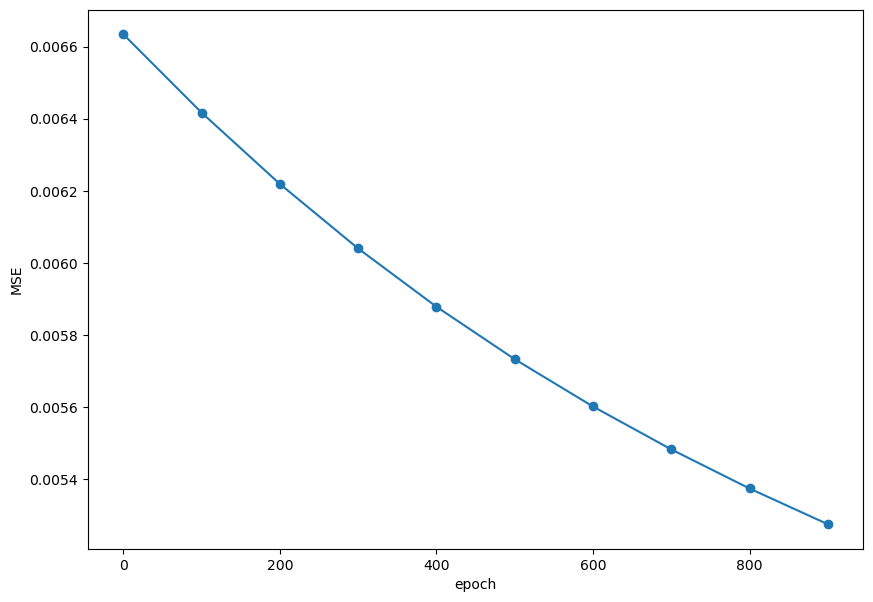

In [19]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses)) * 100, losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')

[ 12  36  60  84 108 132 156 180 204 228 252 276 300 324 348 372 396 420
 444 468 492]


/var/folders/5b/sws7s1891bx1rlrkrscwxs_h0000gn/T/ipykernel_4928/879155691.py:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  _ = ax.set_xticklabels(dates[12::24], rotation=45)


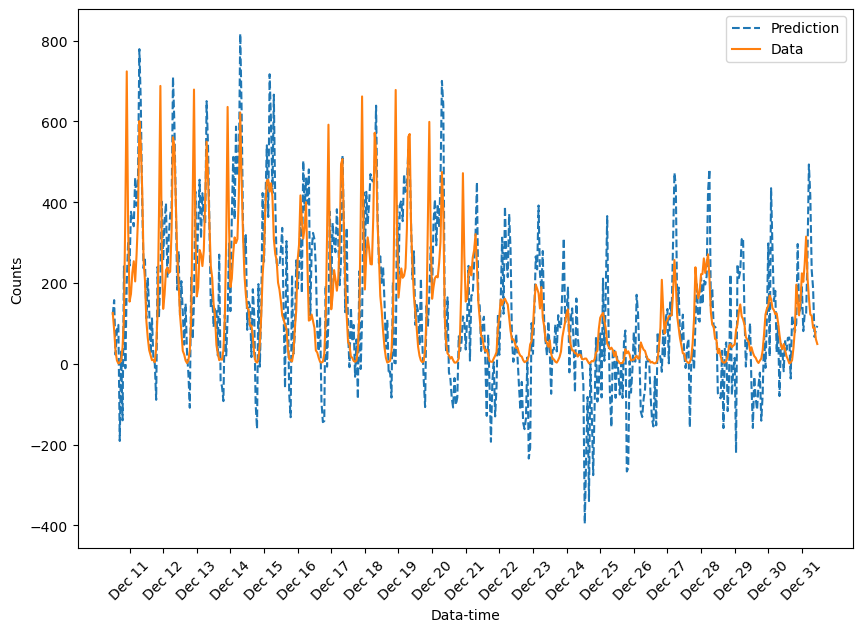

In [28]:
targets = test_targets['cnt']
targets = targets.values.reshape([len(targets), 1])
targets = targets.astype(float)

x = Variable(torch.FloatTensor(test_features.values))
y = Variable(torch.FloatTensor(targets))

y_predict = neu(x)
y_predict = y_predict.data.numpy()

fig, ax = plt.subplots(figsize=(10, 7))

mean, std = scaled_features['cnt']
ax.plot(y_predict * std + mean, label='Prediction', linestyle='--')
ax.plot(targets * std + mean, label='Data', linestyle='-')
ax.legend()
ax.set_xlabel('Data-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
# print(dates)
dates = dates.apply(lambda d : d.strftime('%b %d'))
# print(dates)
# print(np.arange(len(dates))[12::24])
ax.set_xticks(np.arange(len(dates))[12::24]) # 取每天的 12 点的值为当天的值
_ = ax.set_xticklabels(dates[12::24], rotation=45)
